In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('data/reestr/Reestr-ZZ-na-18.05.2021.xlsx')
df.head()

,Корректировка реестра,Unnamed: 1,Предприятие,Лицензионный участок,Unnamed: 4,Вид приоритетного загрязняющего вещества,Регистрационный номер загрязненного участка (предприятия),Регистрационный номер загрязненного участка в Реестре,Старые регистрационные номера (примечание),Местоположение загрязненного участка,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,NaN,NaN,NaN,Название,Номер,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,2,3,4,5,6,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,394 Т,ЛУК-2016-6,NaN,Район КП №186 (15м от дороги),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,395 Т,ЛУК-2016-7,NaN,Район КП №186 (30м от дороги),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,433Т,ЛУК-КГ-2018-1,NaN,т.вр.251А-т.вр.250А,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
useful_cols = ['Площадь загрязненного участка, га',  'Координаты загрязненного участка (в географической системе координат)', 'Unnamed: 12', 'Дата факта последнего разлива']

useful_df = df[useful_cols]
useful_df.columns = ['area', 'lon', 'lat', 'date']
area_df = useful_df.iloc[2:].dropna()
area_df

,area,lon,lat,date
2,0.1703,"73° 30' 24,6""","62° 35' 33,3""",1905-07-08 00:00:00
3,0.2595,"73° 30' 29,5""","62° 32' 36,6""",1905-07-08 00:00:00
4,0.1559,"73°20'52""","62°37' 00""",1905-07-10 00:00:00
5,0.0100,"73°32'50,9""","62°33' 27,4""",2019
6,0.0050,"73°59'00,23""","62°07'45,67""",2019
...,...,...,...,...
12027,0.0983,77.742867,61.166608,**
12029,0.0001,77.885611,61.310111,2018-02-28 00:00:00
12031,0.1541,77.865905,61.355532,нет данных
12036,0.0200,"77° 32´ 21,5´´","61°19´00,8´´",18.03.2020


In [6]:
import re
def preprocess_date(x):
    y = re.search(r'\d{4}', str(x))
    if y:
        return int(y[0])
    return None

area_df['year'] = area_df['date'].apply(preprocess_date)

In [7]:
area_by_year = area_df[area_df['year'] > 2000].groupby('year').sum()

Text(0.5, 1.0, 'Суммарная площадь нефтеразливов по годам')

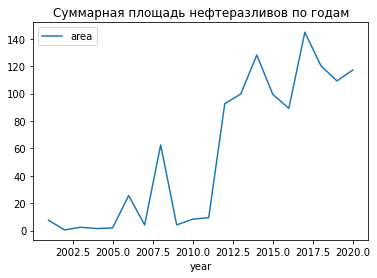

In [8]:
area_by_year.plot()
plt.title('Суммарная площадь нефтеразливов по годам')

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
import pmdarima as pmd
import numpy as np

In [29]:
model = pmd.auto_arima(np.log(area_by_year + 10), seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46.999, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42.290, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45.363, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=44.164, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43.944, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=41.714, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=43.228, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=43.006, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=43.118, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=44.995, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.349 seconds


In [35]:
pred = (np.exp(model.predict(2)) - 10).tolist()

C:\Users\koval\anaconda3\envs\time-series-forecasting\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


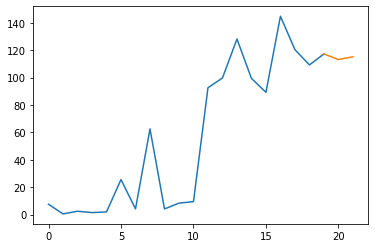

In [36]:
plt.plot(range(len(area_by_year)), area_by_year.values)
plt.plot(range(len(area_by_year) - 1, len(area_by_year) + 2), [area_by_year.values[-1]] + pred)

In [11]:
area_df.groupby('year').sum()

,area
year,
1900.0,0.000900
1905.0,23.668700
1954.0,0.266500
1990.0,2.745000
1991.0,3.283700
1995.0,0.137000
1996.0,0.330000
1997.0,0.175000
1998.0,0.144000


<AxesSubplot:xlabel='year'>

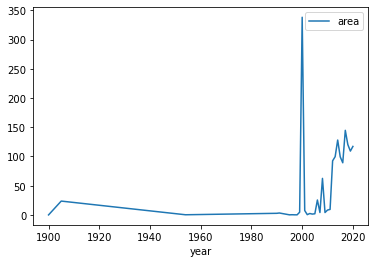

In [27]:
area_df.groupby('year').sum().plot()